In [1]:
import sys
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
from numpy import *
from pylab import *
import cmocean as cm
%matplotlib inline

/home/156/jm5970/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:]/100)
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

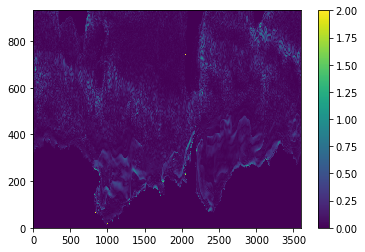

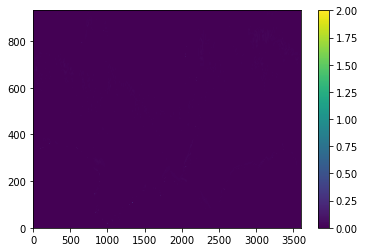

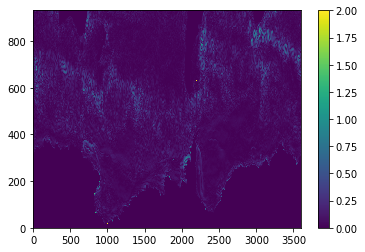

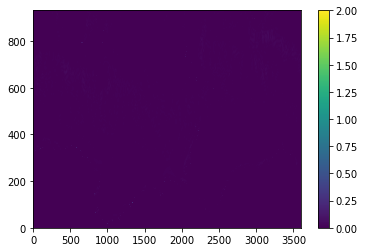

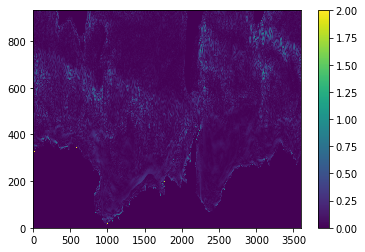

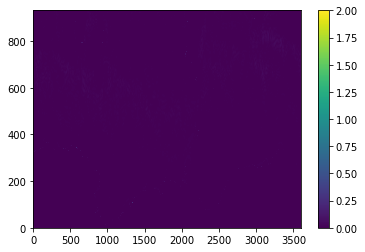

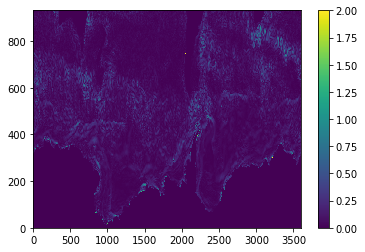

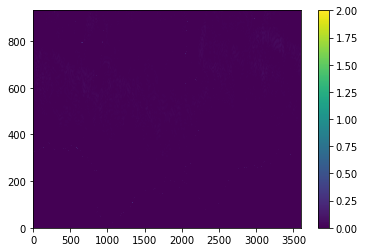

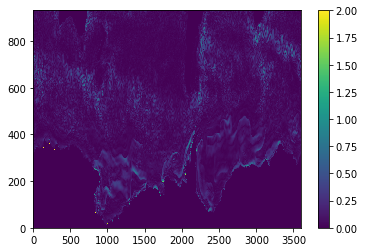

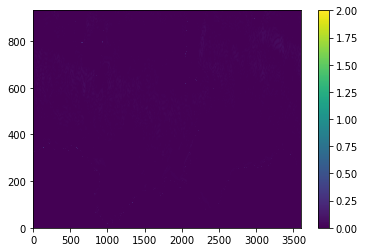

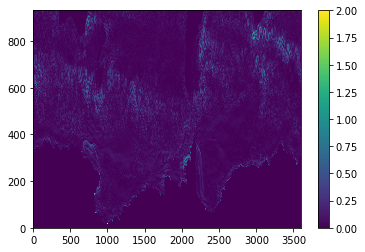

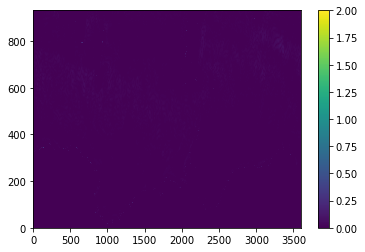

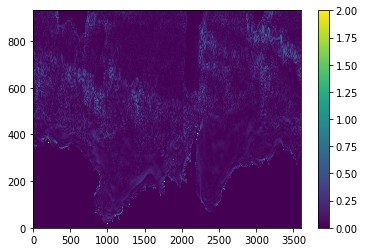

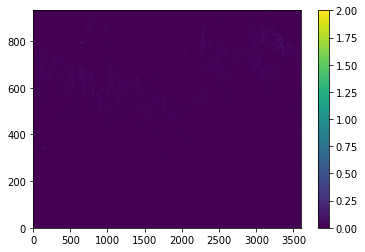

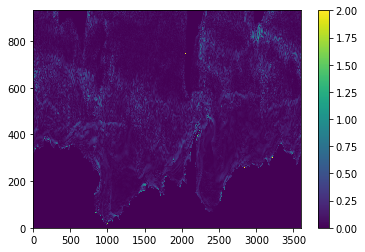

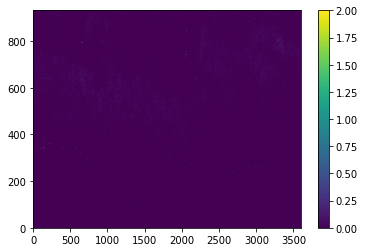

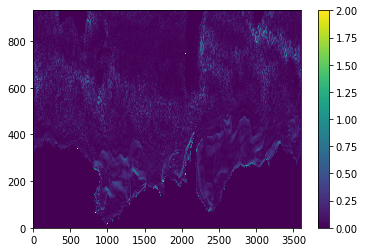

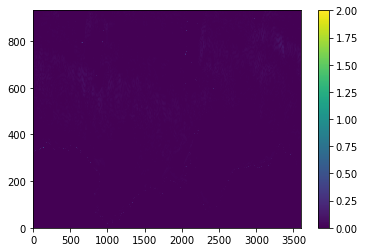

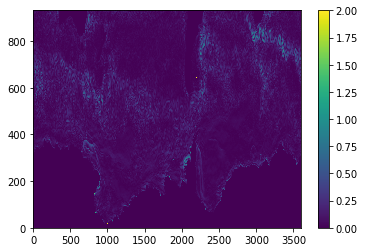

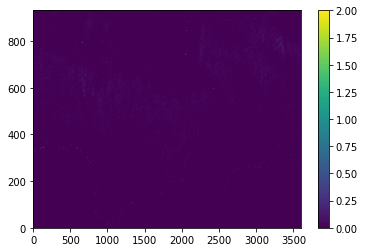

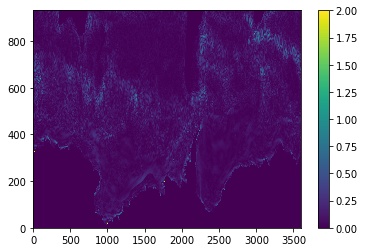

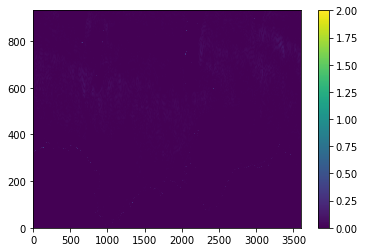

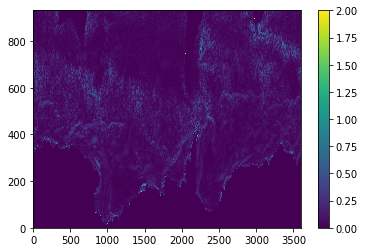

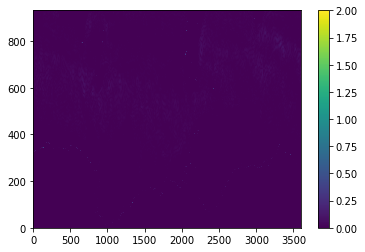

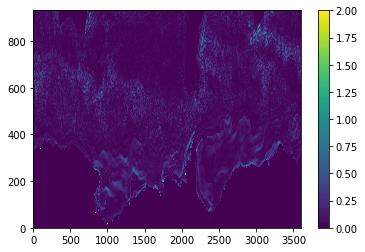

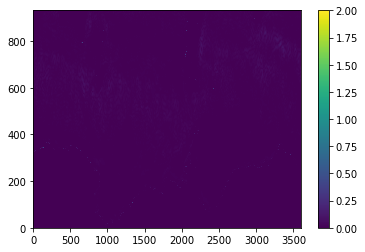

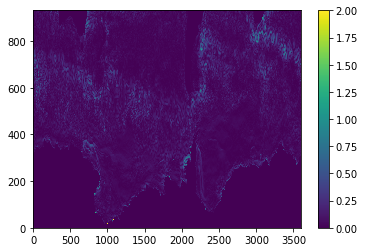

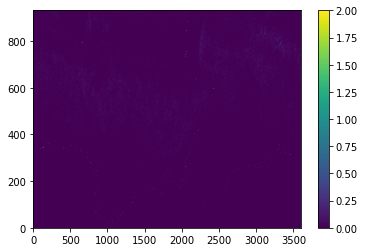

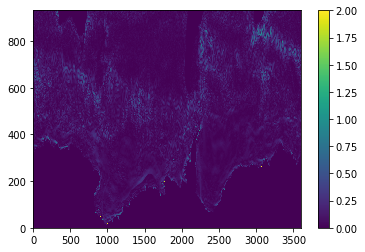

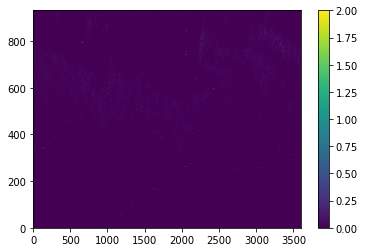

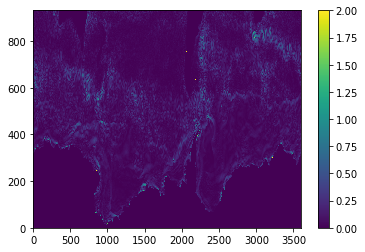

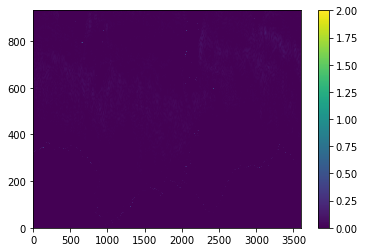

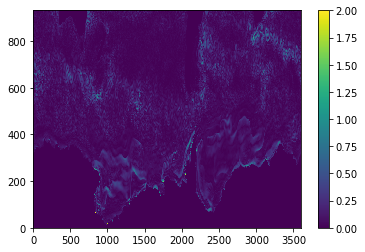

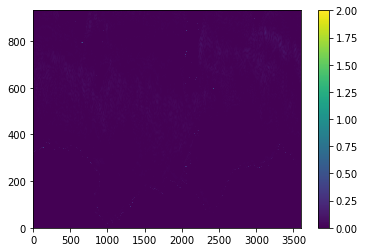

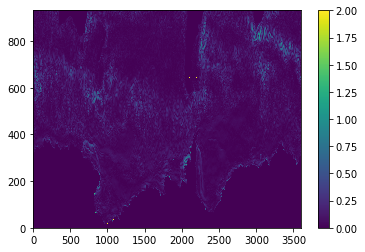

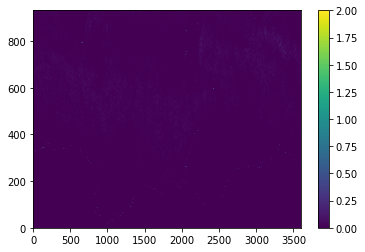

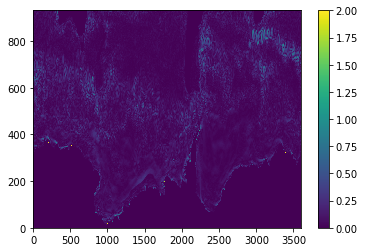

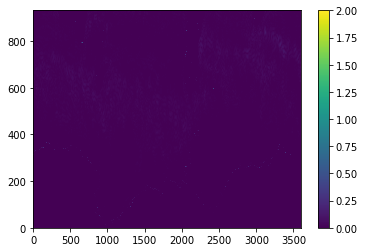

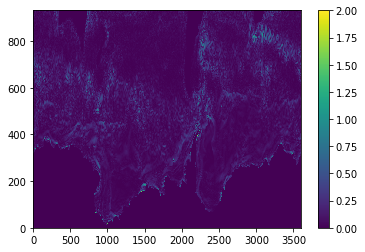

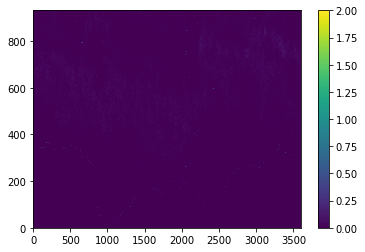

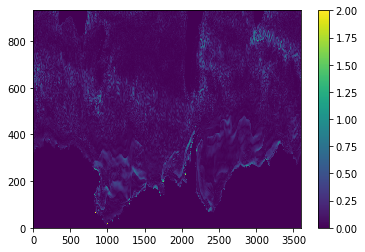

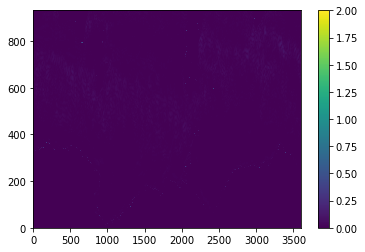

In [4]:
index=0
datanumbername=range(306,327)
#eke =zeros(shape(eddyu))
#bjke =zeros(shape(eddyu))
mean_u=zeros([len(range(306,327)),shape(ssh_mean)[0],shape(ssh_mean)[1]])
mean_v=zeros([len(range(306,327)),shape(ssh_mean)[0],shape(ssh_mean)[1]])
for ii in datanumbername:
    # Output data path
    outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output'+str(ii)+'/'
    # Import SSH values to python environment.
    ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
    eta=ncfile.variables['eta_t'][:]
    mask=ma.getmask(eta[0,:,:])
    
    eta=(eta-ssh_mean)
    
    u_g=zeros(shape(eta))
    v_g=zeros(shape(eta))
    for ii in range(0,shape(eta)[0]):
        u_g[ii,:,:],v_g[ii,:,:]=geovelfield(eta[ii,:,:],lon,lat,mask)
    mean_u[index,:,:]=mean(u_g,axis=0)
    mean_v[index,:,:]=mean(v_g,axis=0)
    
    #pcolormesh(ssh_mean)
    #colorbar()
    #show()
    #pcolormesh(eta[0,:,:])
    #colorbar()
    #show()
    pcolormesh(sqrt(u_g[0,:,:]**2+v_g[0,:,:]**2),vmin=0,vmax=2)
    colorbar()
    show()
    pcolormesh(sqrt(mean(mean_u,axis=0)**2+mean(mean_v,axis=0)**2),vmin=0,vmax=2)
    colorbar()
    show()
    index=index+1

In [5]:
filename='/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_u_7yrs.nc'
var=mean(mean_u,axis=0)
varname='U_mean'
units='m/s'
nc_description='Velocity of SSHa at the Southern Ocean of January over 1 years'
dim='2D'
vargeonc(filename,lat,lon,var,0,varname,nc_description=nc_description,units=units,dt='',dim=dim)

1


In [7]:
filename='/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_v_7yrs.nc'
var=mean(mean_v,axis=0)
varname='V_mean'
units='m/s'
nc_description='Velocity of SSHa at the Southern Ocean of January over 1 years'
dim='2D'
vargeonc(filename,lat,lon,var,0,varname,nc_description=nc_description,units=units,dt='',dim=dim)

1


# Save data mean velocity satellite.

In [ ]:
from calendar import monthrange
year=1993
monthsin=[1,4,7,10]
monthsend=[4,7,10,13]
inputfiles='/g/data/ua8/CMEMS_SeaLevel/v3-0/'+str(year)+'/'

ncfile=Dataset(inputfiles+'dt_global_allsat_phy_l4_'+str(year)+'0101_20170110.nc')
ssha=squeeze(ncfile.variables['sla'][:])
mask=ma.getmask(ssha[:,:])
lon=ncfile.variables['longitude'][:]
lat=ncfile.variables['latitude'][:]

mean_u=zeros([len(monthsin),shape(ssha)[0],shape(ssha)[1]])
mean_v=zeros([len(monthsin),shape(ssha)[0],shape(ssha)[1]])

for ii in range(len(monthsin)):
    print('Analizing the year ',year,'in the months[',monthsin,'-',monthsend,']')
    
    
    dayssum=0
    for month in range(monthsin[ii],monthsend[ii]):
        dayssum=dayssum+monthrange(int(year), month)[1] 
    
    u_g=zeros([dayssum,shape(ssha)[0],shape(ssha)[1]])
    v_g=zeros([dayssum,shape(ssha)[0],shape(ssha)[1]])
    
    count=0
    print('Start loading data')
    for month in range(monthsin[ii],monthsend[ii]):
        daysmonth=monthrange(int(year), month)[1]
        for days in range(1,daysmonth+1):
            ncfile=Dataset(inputfiles+'dt_global_allsat_phy_l4_'+str(year)+'%02d'%month+'%02d'%days+'_20170110.nc')
            ssha=squeeze(ncfile.variables['sla'][:])
            u_g[count,:,:],v_g[count,:,:]=geovelfield(ssha[:,:],lon,lat,mask)
            count=count+1

    mean_u[ii,:,:]=mean(u_g,axis=0)
    mean_v[ii,:,:]=mean(v_g,axis=0)

filename='/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_u_satellite_1yrs.nc'
var=mean(mean_u,axis=0)
varname='U_mean'
units='m/s'
nc_description='Velocity of SSHa of satellite data from January over 1 years'
dim='2D'
vargeonc(filename,lat,lon,var,0,varname,nc_description=nc_description,units=units,dt='',dim=dim)
    
filename='/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_v_satellite_1yrs.nc'
var=mean(mean_v,axis=0)
varname='V_mean'
units='m/s'
nc_description='Velocity of SSHa of satellite data from January over 1 years'
dim='2D'
vargeonc(filename,lat,lon,var,0,varname,nc_description=nc_description,units=units,dt='',dim=dim)

# Save data manually over velocity field.

In [ ]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output310/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_u.nc')
u=ncfile.variables['u'][:,0,:,:]
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_v.nc')
v=ncfile.variables['v'][:,0,:,:]
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xu_ocean_sub01'][:]
lat=ncfile.variables['yu_ocean_sub01'][:]
u_mean=mean(u,axis=0)
v_mean=mean(v,axis=0)

In [ ]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output311/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_u.nc')
u1=ncfile.variables['u'][:,0,:,:]
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_v.nc')
v1=ncfile.variables['v'][:,0,:,:]
u_mean1=mean(u1,axis=0)
v_mean1=mean(v1,axis=0)

In [ ]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output312/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_u.nc')
u2=ncfile.variables['u'][:,0,:,:]
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_v.nc')
v2=ncfile.variables['v'][:,0,:,:]
u_mean2=mean(u2,axis=0)
v_mean2=mean(v2,axis=0)

In [ ]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output313/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_u.nc')
u3=ncfile.variables['u'][:,0,:,:]
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_v.nc')
v3=ncfile.variables['v'][:,0,:,:]
u_mean3=mean(u3,axis=0)
v_mean3=mean(v3,axis=0)

In [ ]:
u_meanyear=(u_mean+u_mean1+u_mean2+u_mean3)/4
v_meanyear=(v_mean+v_mean1+v_mean2+v_mean3)/4

In [ ]:
u=u-u_meanyear
v=v-v_meanyear
u1=u1-u_meanyear
v1=v1-v_meanyear
u2=u2-u_meanyear
v2=v2-v_meanyear
u3=u3-u_meanyear
v3=v3-v_meanyear

In [ ]:
filename='/home/156/jm5970/notebooks/traceddy/data.input/u_2yrs_mean.nc'
var=u_meanyear
varname='U_mean'
units='m/s'
nc_description='Velocity of the Southern Ocean of January over 1 years'
dim='2D'
vargeonc(filename,lat,lon,var,0,varname,nc_description=nc_description,units=units,dt='',dim=dim)

In [ ]:
filename='/home/156/jm5970/notebooks/traceddy/data.input/v_2yrs_mean.nc'
var=v_meanyear
varname='V_mean'
units='m/s'
nc_description='Velocity of the Southern Ocean of January over 1 years'
dim='2D'
vargeonc(filename,lat,lon,var,0,varname,nc_description=nc_description,units=units,dt='',dim=dim)